In [63]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
%config InlineBackend.figure_format = 'retina'

Подготовим метод `plot_discrete_function` для построения графика дискретной функции.

In [64]:
def plot_discrete_function(x, y, ax, label):
    ax.set_title(label)
    ax.scatter(x, y, color='black', marker='o', s=0.1)

Дискретным преобразованием Фурье дискретной функции $\{x_n\}_{n=0}^{N-1}$ называется набор чисел $X_k$, определяемых по формуле
$$
X_k=\sum_{n=0}^{N-1}x_n \cdot e^{-\frac{2\pi i}{N}kn},\;\; k=0,\ldots,N-1.
$$
Обратное преобразование Фурье находится по формуле
$$
x_n=\frac{1}{N}\sum_{k=0}^{N-1}X_k \cdot e^{\frac{2\pi i}{N}kn},\;\; n=0,\ldots,N-1.
$$
Реализуем алгоритм быстрого преобразования Фурье, работающий за $\mathcal{O}(n\log n)$.

In [65]:
def root_of_unity(n, k):
    return np.exp(2j * np.pi * k / n)

def FFT(x):
    n = len(x)
    if n == 1:
        return x
    y0 = FFT(x[0::2])
    y1 = FFT(x[1::2])
    roots_of_unity = np.array([root_of_unity(n, -k) for k in range(n // 2)])
    return np.concatenate((y0 + roots_of_unity * y1, y0 - roots_of_unity * y1))

def FFTReverse(x):
    return np.conj(FFT(np.conj(x))) / len(x)

Сравним `FFT` и `FFTReverse` с функциями, определёнными в `np.fft`:

In [66]:
np.random.seed(0)
for i in range(1000):
    x = np.random.rand(64) + 1j * np.random.rand(64)
    fft1, fft2 = FFT(x), np.fft.fft(x)
    ifft1, ifft2 = FFTReverse(fft1), np.fft.ifft(fft2)
    assert np.isclose(fft1, fft2).all(), "FFT is incorrect"
    assert np.isclose(ifft1, ifft2).all(), "FFTReverse is incorrect"
print("OK!")

OK!


Подготовим дискретизации функций
$$
y_1=x;\; y_2=x^2;\; y_3=\sin x;\; y_4=\sin x^2;\; y_5=\frac{\sin x}{x}.
$$

In [67]:
x = np.linspace(0.01, 10, 1024)
functions = [
    (r'$y=x$', lambda x: x),
    (r'$y=x^2$', lambda x: x**2),
    (r'$y=\sin x$', lambda x: np.sin(x)),
    (r'$y=\sin x^2$', lambda x: np.sin(x**2)),
    (r'$y=\frac{\sin x}{x}$', lambda x: np.sin(x) / x)]
y = [f(x) for n, f in functions]

Последовательно применим к исследуемым функциям прямое и обратное преобразования Фурье, а затем построим графики получившихся функций.

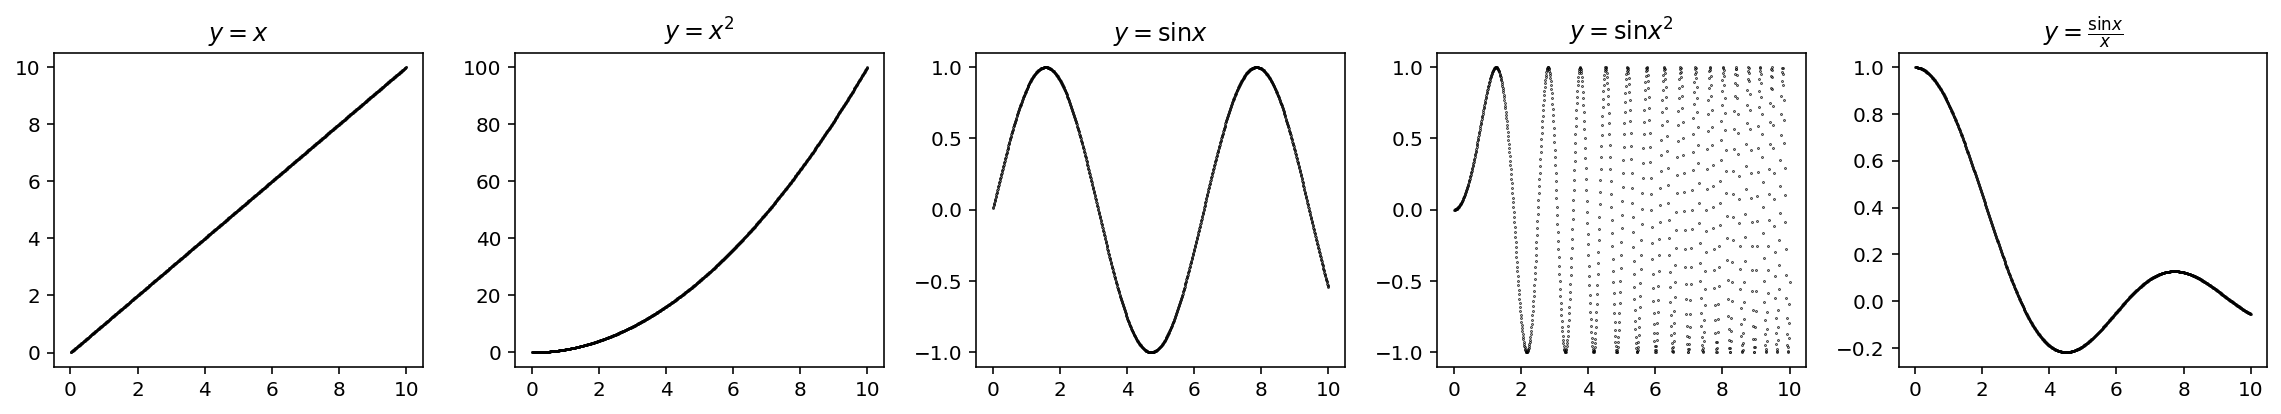

In [68]:
fig, ax = plt.subplots(1, len(y), figsize=(16, 3))
for i in range(len(y)):
    g = FFT(y[i])
    f2 = np.real(FFTReverse(g))
    plot_discrete_function(x, f2, ax[i], functions[i][0])
plt.tight_layout()

Обнулим некоторую долю $D$ последних коэффициентов $FFT(y_i)$. Построим графики обратного преобразования Фурье для нескольких значений $D$.

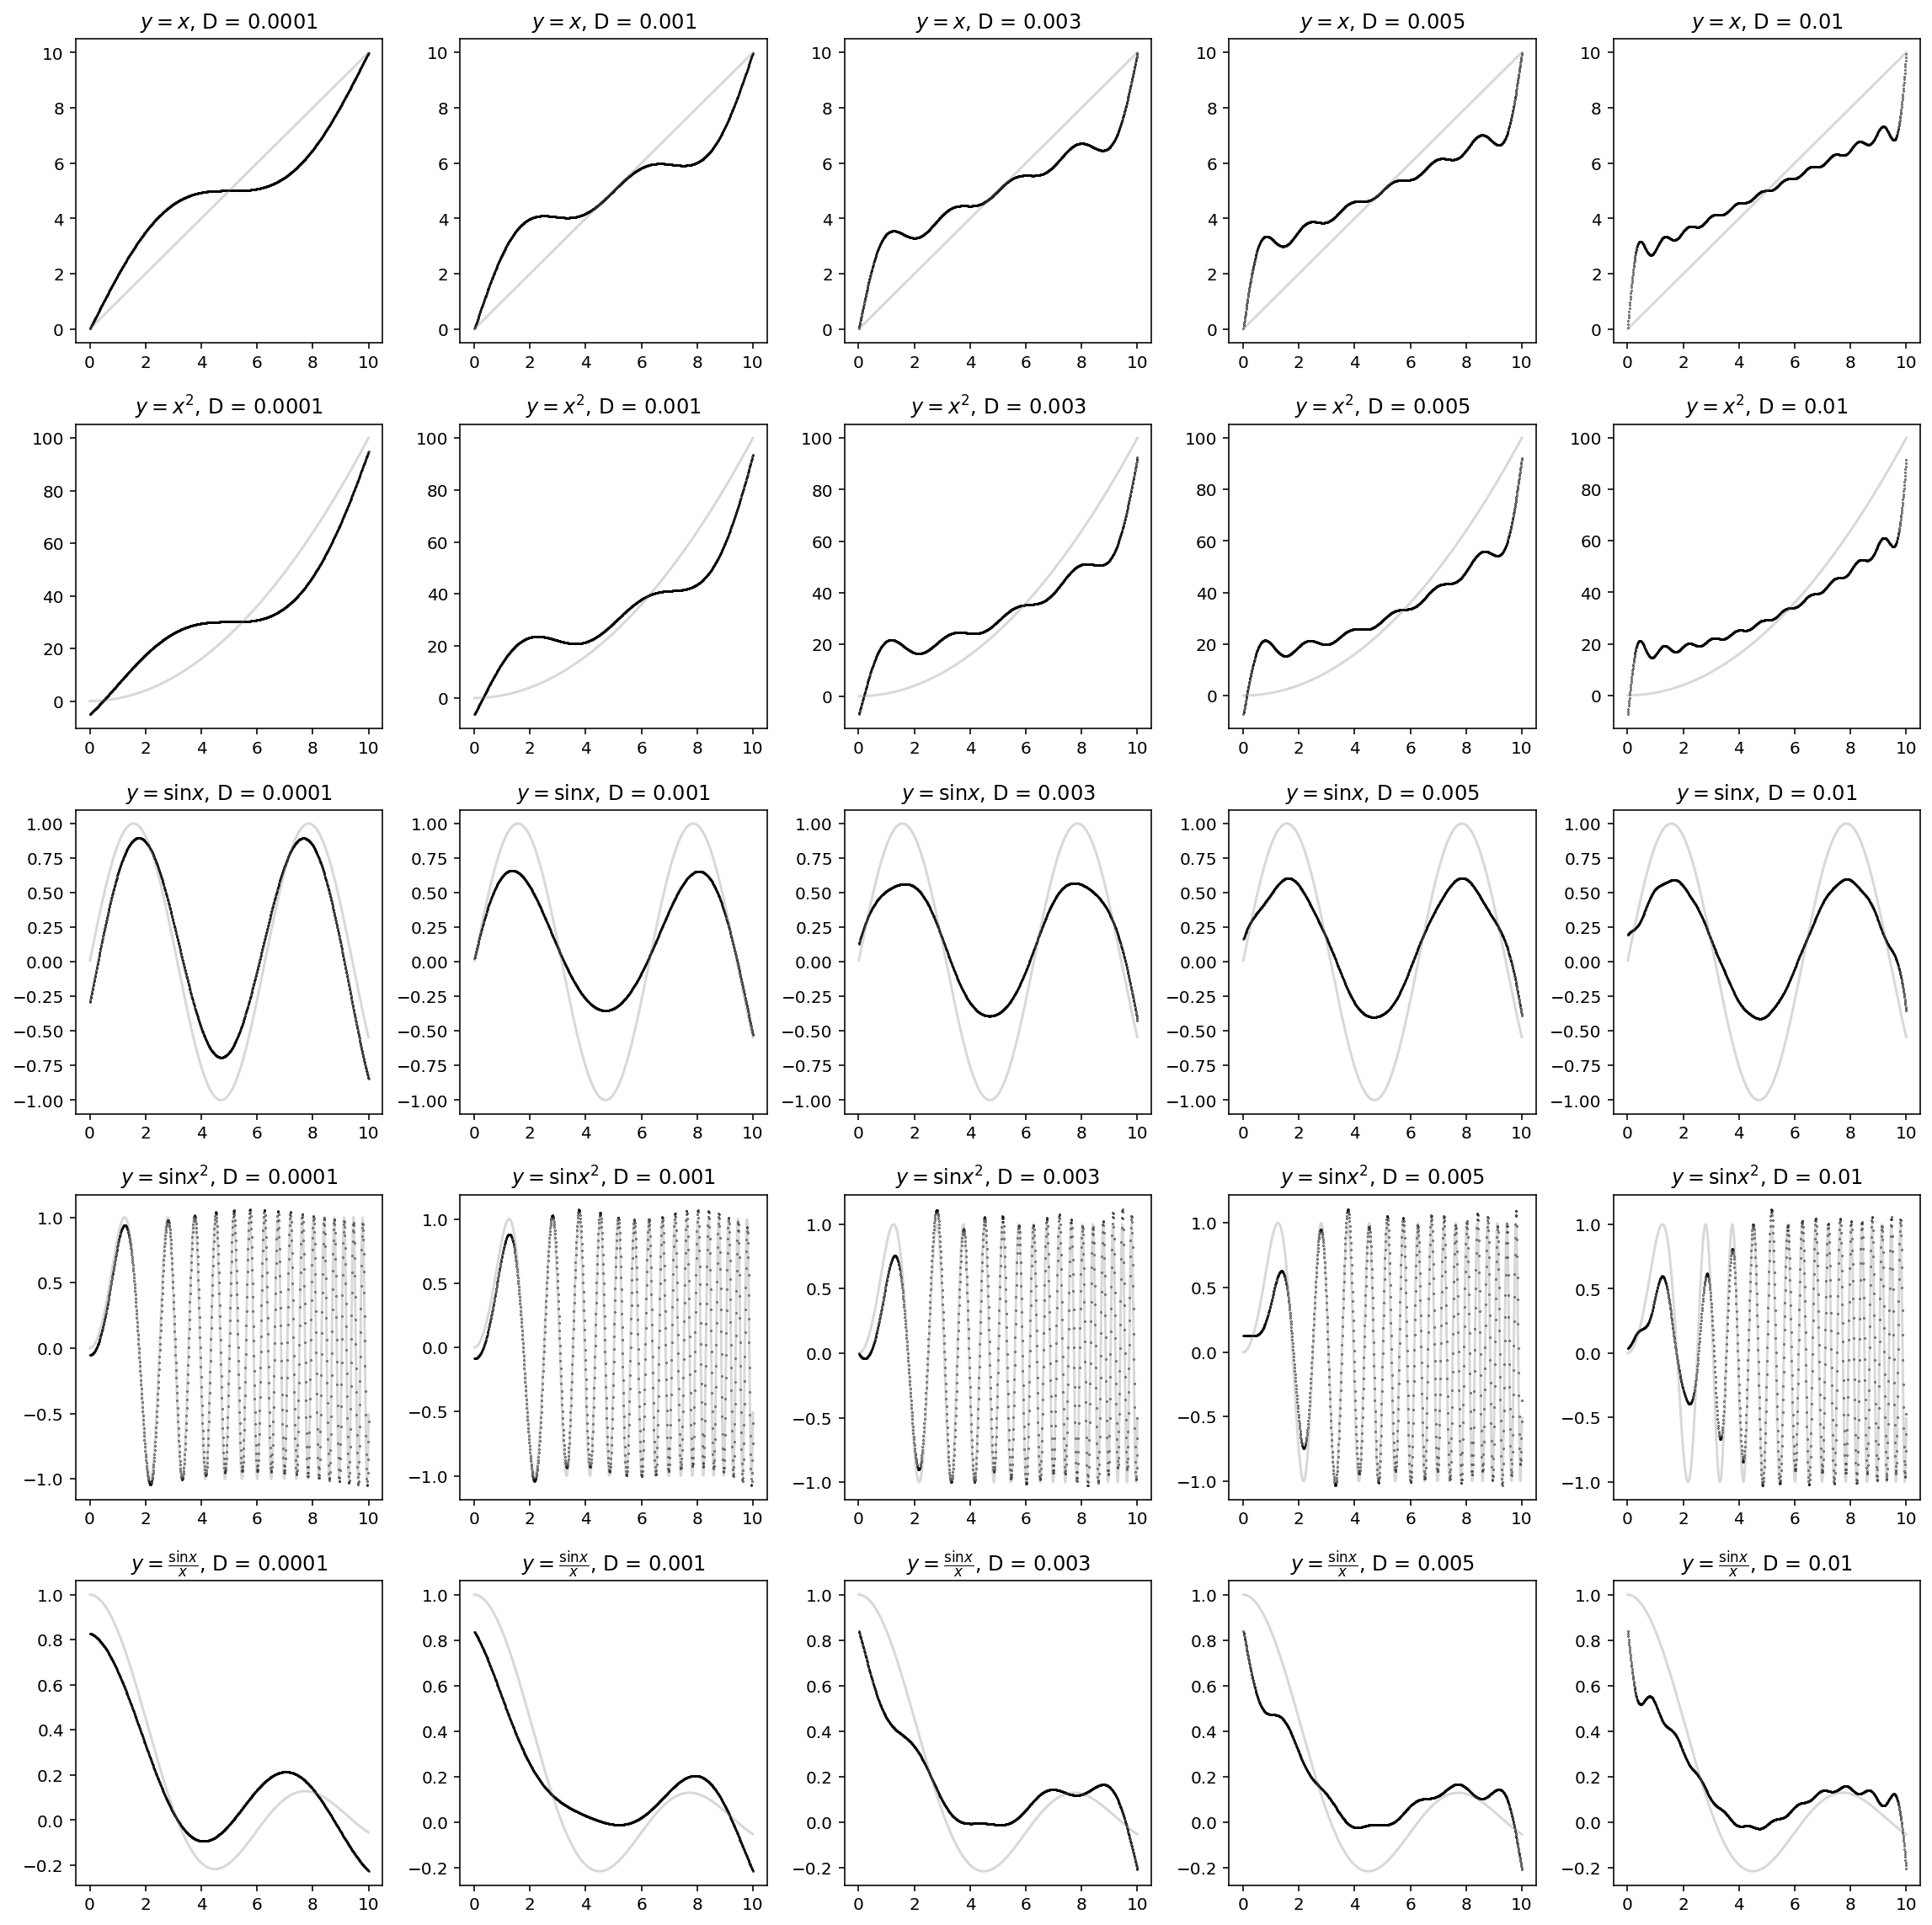

In [69]:
D = [0.0001, 0.001, 0.003, 0.005, 0.01]
fig, ax = plt.subplots(len(y), len(D), figsize=(16, 16))
for i in range(len(y)):
    for j in range(len(D)):
        g = FFT(y[i])
        for k in range(int((1 - D[j]) * len(g)), len(g)):
            g[k] = 0
        f2 = np.real(FFTReverse(g))
        ax[i][j].plot(x, y[i], color='grey', alpha=0.3)
        plot_discrete_function(x, f2, ax[i][j],
            functions[i][0] + ', D = ' + str(D[j]))
plt.tight_layout()

Видно, что даже при обнулении последнего коэффициента прямого преобразования Фурье ($D=0.0001$) графики всех исследуемых функций значительно искажаются.